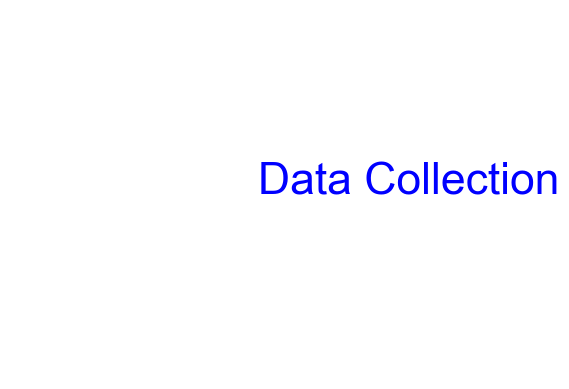

In [30]:
plt.text(0.5, 0.5, 'Data Collection', color='blue', fontsize=32, fontfamily='Arial')
plt.axis('off')
plt.show()

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import dataclasses
from selenium import webdriver


# Base URL for job search website
BASE_URL = 'https://www.alljobs.co.il/SearchResultsGuest.aspx?page={}&position={}&type=&source=&duration=0&exc=&region='


# List to store job data
jobs = []


# Define Category data class
@dataclasses.dataclass
class Category:
    id: str
    is_hitech: bool


@dataclasses.dataclass(eq=True, frozen=True)
class Job:
    category: Category
    description: str

# Function to open the browser and initiate web scraping
def open_browser():
    s = Service(executable_path=('C:/Users/tomer/Downloads/chromedriver_win32 (2)/chromedriver.exe'))
    o = Options()
    o.add_argument("--headless")
    o.add_argument("--no-sandbox")
    o.add_argument("--pageLoadStrategy=eager")
    driver = webdriver.Chrome(service=s, options=o)
    crawl(driver)
    

# Function to crawl through job categories
def crawl(driver):
    categories = [Category(id="431", is_hitech=True),
                  Category(id="236", is_hitech=True),
                  Category(id="320", is_hitech=True),
                  Category(id="1806", is_hitech=True),
                  Category(id="969", is_hitech=True),
                  Category(id="330", is_hitech=True),
                  Category(id="357", is_hitech=True),
                  Category(id="1541", is_hitech=True),
                  Category(id="235", is_hitech=True),

                  Category(id="776", is_hitech=False),
                  Category(id="262", is_hitech=False),
                  Category(id="278", is_hitech=False),
                  Category(id="292", is_hitech=False),
                  Category(id="299", is_hitech=False),
                  Category(id="449", is_hitech=False),
                  Category(id="1380", is_hitech=False),
                  Category(id="366", is_hitech=False),
                  Category(id="722", is_hitech=False),
                  Category(id="383", is_hitech=False),
                  Category(id="644", is_hitech=False),
                  Category(id="469", is_hitech=False),
                  Category(id="442", is_hitech=False),
                  Category(id="1464", is_hitech=False),
                  Category(id="442", is_hitech=False),
                  Category(id="527", is_hitech=False),
                  Category(id="552", is_hitech=False),
                  Category(id="594", is_hitech=False),
                  Category(id="576", is_hitech=False),
                  Category(id="634", is_hitech=False),
                  Category(id="609", is_hitech=False),
                  Category(id="627", is_hitech=False),
                  Category(id="1805", is_hitech=False),
                  Category(id="1637", is_hitech=False),
                  Category(id="493", is_hitech=False)]

    for category in categories:
        try:
            driver.get(BASE_URL.format(1, category.id))
            browse_category(driver, category=category)
        except:
            continue
    driver.quit()


# Function to browse through job listings in a category
def browse_category(driver, category):
    try:
        extract_jobs(driver, category)
        next_page = driver.find_element(By.CSS_SELECTOR, "div.jobs-paging-next a")
        driver.get(next_page.get_property('href'))
        browse_category(driver, category)
    except:
        return


# Function to extract job descriptions from a page
def extract_jobs(driver, category):
    try:
        job_descriptions = driver.find_elements(By.CSS_SELECTOR, "div.job-content-top-acord")
        for job_description in job_descriptions:
            jobs.append(Job(category=category, description=job_description.text.strip().rstrip()))
    except:
        return

# Function to save job data to a CSV file
def save(jobs):
    df = pd.DataFrame([{**vars(job), **vars(job.__dict__['category'])} for job in list(jobs)])
    df.to_csv('Jobs_Data_Before_Cleaning.csv', index=False, encoding='utf-8-sig')


# Main execution
open_browser()
save(jobs)




Our Data Frame Before Cleaning

In [2]:
df1 = pd.read_csv('Jobs_Data_Before_Cleaning.csv')
df1

,category,description,id,is_hitech
0,"Category(id='431', is_hitech=True)",רוצה לעבוד בארגון ממשלתי יציב?\nארגון שדואג לע...,431,True
1,"Category(id='431', is_hitech=True)","לארגון בטחוני מוביל, דרוש/ה מפתח /ת אוטומציה מ...",431,True
2,"Category(id='431', is_hitech=True)",חברת One Taldor מגייסת QA לגוף ממשלתי בירושלים...,431,True
3,"Category(id='431', is_hitech=True)","אלעד מערכות מגייסת בודק /ת תוכנה מנוסה, בעל /ת...",431,True
4,"Category(id='431', is_hitech=True)",למפעל אנג'ל בנתיבות דרוש /ה מנהל /ת איכות אתרי...,431,True
...,...,...,...,...
16271,"Category(id='469', is_hitech=False)",דרוש /ה מרצה ל-V-RAY למכללה לחרדים בבני ברק (ל...,469,False
16272,"Category(id='469', is_hitech=False)",דרוש /ה משלב /ת לשנה הבאה לגן טרום חובה בכפר ס...,469,False
16273,"Category(id='469', is_hitech=False)",דרוש /ה סייע /ת אישי /ת לבחור צעיר עם צרכים מי...,469,False
16274,"Category(id='469', is_hitech=False)",לתוכנית ייחודית וחדשנית לצעירים עם הנמכה שכלית...,469,False


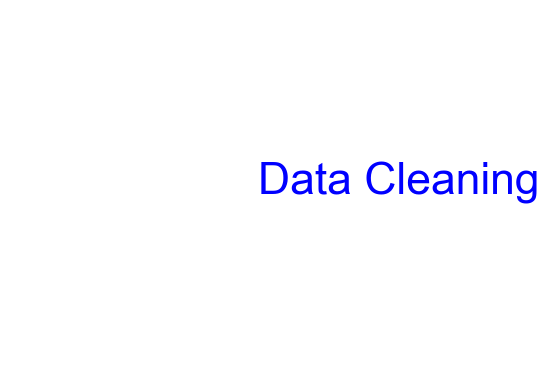

In [29]:
plt.text(0.5, 0.5, 'Data Cleaning', color='blue', fontsize=32, fontfamily='Arial')
plt.axis('off')
plt.show()

In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import dataclasses
from selenium import webdriver
# Function to clean the CSV file
def clean_csv():
    # Read the unclean CSV file
    unclean_csv = pd.read_csv('Jobs_Data_Before_Cleaning.csv')
    # Clean the job description column using the clean_text function
    unclean_csv['description'] = unclean_csv['description'].apply(clean_text)
    # Drop the category column
    unclean_csv.drop('category', axis=1, inplace=True)
    # Save the cleaned CSV file
    unclean_csv.to_csv('Jobs_Data_After_Cleaning.csv', index=False)
    unclean_csv.replace('\n', '', regex=True, inplace=True)
    # Drop rows with NaN values in the specified columns
    unclean_csv.dropna(subset=['description'], inplace=True)
    # Reset the index after dropping rows
    unclean_csv.reset_index(drop=True, inplace=True)
    

# Function to clean the text
def clean_text(text):
    # Remove non-alphanumeric and non-space characters
    cleaned_text = re.sub('[^\w\s]', '', text)
    # Strip leading and trailing whitespaces
    cleaned_text = cleaned_text.strip().rstrip()
    return cleaned_text

# Clean the CSV file
clean_csv()

Our Data Frame After Cleaning

In [2]:
df2 = pd.read_csv('Jobs_Data_After_Cleaning.csv')
df2

,description,id,is_hitech
0,רוצה לעבוד בארגון ממשלתי יציב\nארגון שדואג לעו...,431,True
1,לארגון בטחוני מוביל דרושה מפתח ת אוטומציה מנוס...,431,True
2,חברת One Taldor מגייסת QA לגוף ממשלתי בירושלים...,431,True
3,אלעד מערכות מגייסת בודק ת תוכנה מנוסה בעל ת יכ...,431,True
4,למפעל אנגל בנתיבות דרוש ה מנהל ת איכות אתרי ת\...,431,True
...,...,...,...
16271,דרוש ה מרצה לVRAY למכללה לחרדים בבני ברק ליד ב...,469,False
16272,דרוש ה משלב ת לשנה הבאה לגן טרום חובה בכפר סבא...,469,False
16273,דרוש ה סייע ת אישי ת לבחור צעיר עם צרכים מיוחד...,469,False
16274,לתוכנית ייחודית וחדשנית לצעירים עם הנמכה שכלית...,469,False


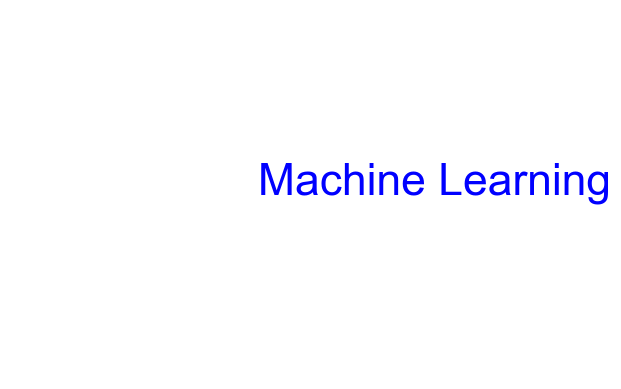

In [3]:
import matplotlib.pyplot as plt 
plt.text(0.5, 0.5, 'Machine Learning', color='blue', fontsize=32, fontfamily='Arial')
plt.axis('off')
plt.show()

In [4]:
# Function to read descriptions and is_hitech values from the cleaned CSV file
def get_descripitions_and_is_hitechs_from_csv():
    csv = pd.read_csv('Jobs_Data_After_Cleaning.csv')
    # Convert NaN values to empty strings for descriptions
    descriptions = [description if isinstance(description, str) else "" for description in csv['description'].values]
    # Convert is_hitech column to a boolean numpy array
    is_hitech_list = np.array(csv['is_hitech'].values, dtype=bool)
    return descriptions, is_hitech_list


descriptions, is_hitech_list = get_descripitions_and_is_hitechs_from_csv()

# Function to train the classifier and vectorizer
def get_classifier_and_vectorizer():
    classes = np.array(is_hitech_list)
    # Initialize the CountVectorizer
    vectorizer = CountVectorizer()
    # Transform descriptions into a vectorized representation
    X = vectorizer.fit_transform(descriptions)
    # Initialize the Multinomial Naive Bayes classifier
    classifier = MultinomialNB()
    # Train the classifier using the vectorized descriptions and is_hitech values
    classifier.fit(X, classes)
    return classifier, vectorizer

classifier, vectorizer = get_classifier_and_vectorizer()

# Function to predict if descriptions are high-tech or not
def predict(descriptions_to_predict):
    predictions = []
    for description in descriptions_to_predict:
        str_description = description
        description = vectorizer.transform([description])
        predicted_is_hitech = classifier.predict(description)
        predictions.append([str_description, predicted_is_hitech])
    return predictions

# Function to calculate the accuracy of predictions
def get_accuracy(predictions, actual_is_hitech_list):
    correct_predictions = 0
    total_predictions = len(predictions)
    for prediction, actual_is_hitech in zip(predictions, actual_is_hitech_list):
        if prediction == actual_is_hitech:
            correct_predictions += 1
    return correct_predictions / total_predictions


is_hitech_predictions = predict(descriptions)
predicted_is_hitech = [is_hitech[1][0] for is_hitech in is_hitech_predictions]
accuracy = get_accuracy(predicted_is_hitech, is_hitech_list)
print(accuracy)

0.8258171540919145


In [5]:
df2 = pd.read_csv('Jobs_Data_After_Cleaning.csv')
df2

,description,id,is_hitech
0,רוצה לעבוד בארגון ממשלתי יציב\nארגון שדואג לעו...,431,True
1,לארגון בטחוני מוביל דרושה מפתח ת אוטומציה מנוס...,431,True
2,חברת One Taldor מגייסת QA לגוף ממשלתי בירושלים...,431,True
3,אלעד מערכות מגייסת בודק ת תוכנה מנוסה בעל ת יכ...,431,True
4,למפעל אנגל בנתיבות דרוש ה מנהל ת איכות אתרי ת\...,431,True
...,...,...,...
16271,דרוש ה מרצה לVRAY למכללה לחרדים בבני ברק ליד ב...,469,False
16272,דרוש ה משלב ת לשנה הבאה לגן טרום חובה בכפר סבא...,469,False
16273,דרוש ה סייע ת אישי ת לבחור צעיר עם צרכים מיוחד...,469,False
16274,לתוכנית ייחודית וחדשנית לצעירים עם הנמכה שכלית...,469,False


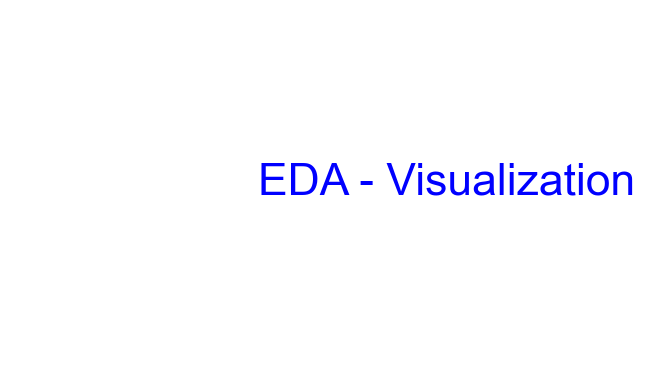

In [6]:
import matplotlib.pyplot as plt

plt.text(0.5, 0.5, 'EDA - Visualization', color='blue', fontsize=32, fontfamily='Arial')
plt.axis('off')
plt.show()


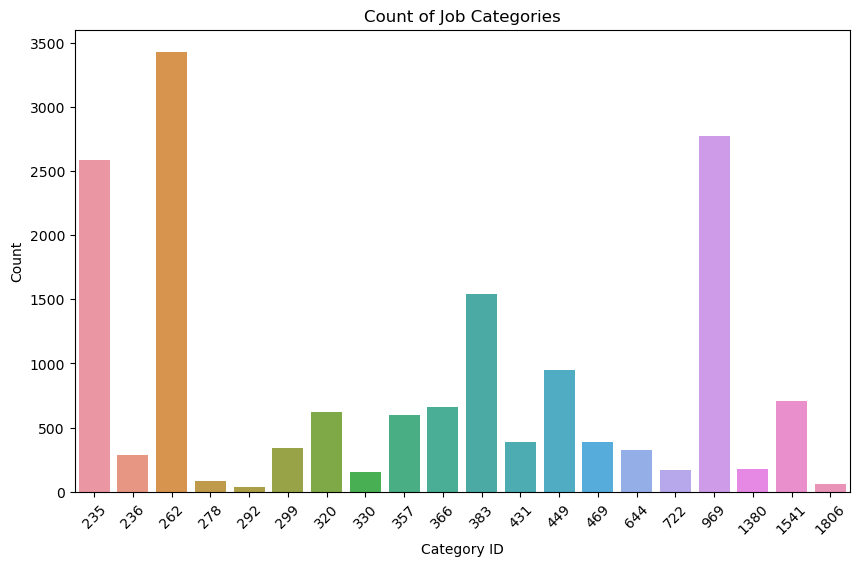

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# EDA with Matplotlib and Seaborn
# Example: Count of job categories
category_counts = df2['id'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.title('Count of Job Categories')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


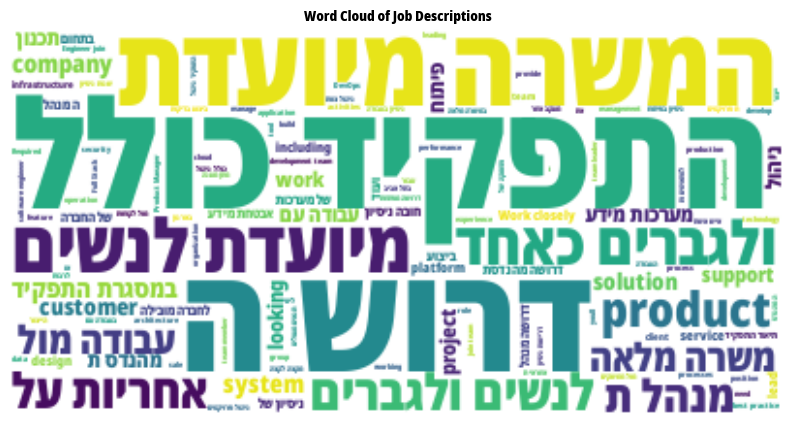

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties
from wordcloud import WordCloud

# Download the stopwords corpus
nltk.download('stopwords')

# Read the CSV file
csv = pd.read_csv('Jobs_Data_After_Cleaning.csv')

# Filter high-tech descriptions
hitech_descriptions = csv[csv['is_hitech'] == True]['description']

# Concatenate high-tech descriptions into a single text
hitech_descriptions_text = ' '.join(hitech_descriptions)

# Split the text into individual words
words = hitech_descriptions_text.split()

# Filter out stopwords from the words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Join the words back into a single string
processed_text = ' '.join(words)

# Convert the Hebrew words to their visual representation
processed_text = get_display(processed_text)

# Create a font properties object for the Hebrew font
hebrew_font_path = r"C:\Users\tomer\Downloads\Noto_Sans_Hebrew\static\NotoSansHebrew_Condensed-Black.ttf"  # Replace with the actual path to your Hebrew font file
hebrew_font = FontProperties(fname=hebrew_font_path)

# Create the WordCloud object with the Hebrew font
wordcloud = WordCloud(background_color='white', font_path=hebrew_font_path).generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions', fontsize=16, fontproperties=hebrew_font)
plt.show()


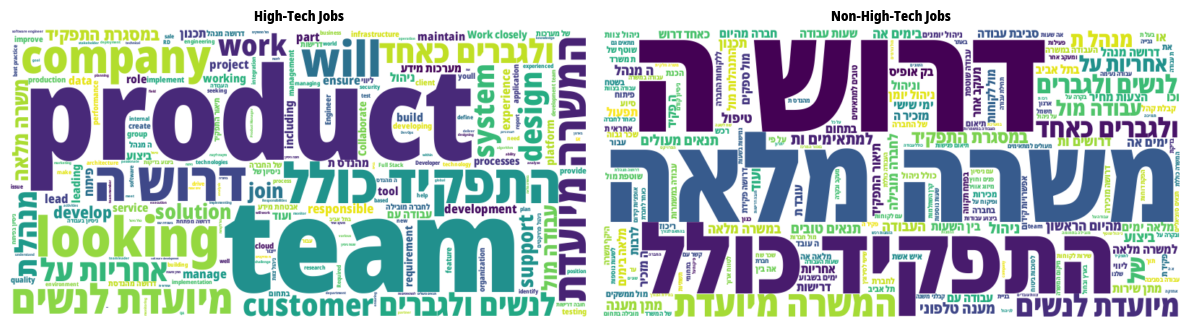

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties

# Read the CSV file
df2 = pd.read_csv('Jobs_Data_After_Cleaning.csv')

# Filter job descriptions for high-tech and non-high-tech jobs
hitech_jobs = df2[df2['is_hitech']]
non_hitech_jobs = df2[~df2['is_hitech']]

# Combine high-tech job descriptions into a single text
hitech_text = ' '.join(hitech_jobs['description'])

# Convert Hebrew words to their visual representation
hitech_text = get_display(hitech_text)

# Combine non-high-tech job descriptions into a single text
non_hitech_text = ' '.join(non_hitech_jobs['description'])

# Convert Hebrew words to their visual representation
non_hitech_text = get_display(non_hitech_text)

# Create a font properties object for the Hebrew font
hebrew_font_path = r"C:\Users\tomer\Downloads\Noto_Sans_Hebrew\static\NotoSansHebrew_Condensed-Black.ttf"  
hebrew_font = FontProperties(fname=hebrew_font_path)

# Generate word cloud for high-tech jobs
hitech_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=hebrew_font_path).generate(hitech_text)

# Generate word cloud for non-high-tech jobs
non_hitech_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=hebrew_font_path).generate(non_hitech_text)

# Plot the word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot word cloud for high-tech jobs
axes[0].imshow(hitech_wordcloud, interpolation='bilinear')
axes[0].set_title('High-Tech Jobs', fontsize=16, fontproperties=hebrew_font)
axes[0].axis('off')

# Plot word cloud for non-high-tech jobs
axes[1].imshow(non_hitech_wordcloud, interpolation='bilinear')
axes[1].set_title('Non-High-Tech Jobs', fontsize=16, fontproperties=hebrew_font)
axes[1].axis('off')

plt.tight_layout()
plt.show()


## Wow Effect

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


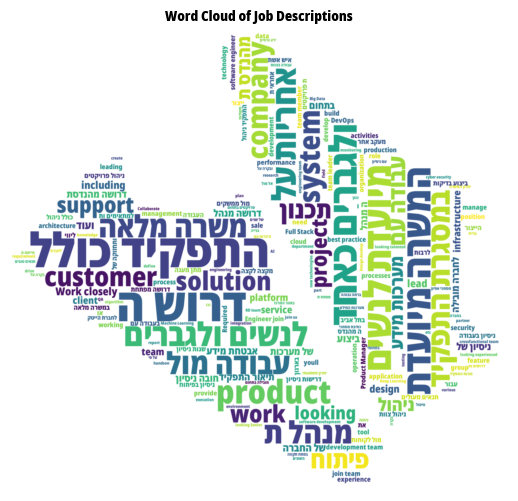

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties
from PIL import Image
import numpy as np

# Download the stopwords corpus
nltk.download('stopwords')

# Read the CSV file
csv = pd.read_csv('Jobs_Data_After_Cleaning.csv')

# Filter high-tech descriptions
hitech_descriptions = csv[csv['is_hitech'] == True]['description']

# Concatenate high-tech descriptions into a single text
hitech_descriptions_text = ' '.join(hitech_descriptions)

# Split the text into individual words
words = hitech_descriptions_text.split()

# Filter out stopwords from the words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Join the words back into a single string
processed_text = ' '.join(words)

# Convert the Hebrew words to their visual representation
processed_text = get_display(processed_text)

# Create a font properties object for the Hebrew font
hebrew_font_path = r"C:\Users\tomer\Downloads\Noto_Sans_Hebrew\static\NotoSansHebrew_Condensed-Black.ttf"  # Replace with the actual path to your Hebrew font file
hebrew_font = FontProperties(fname=hebrew_font_path)

# Create a mask for the word cloud shape
mask_image_path = r"C:\Users\tomer\Downloads\tennis-7968714_1920.png"
mask_image = np.array(Image.open(mask_image_path))

# Create the WordCloud object with the Hebrew font and mask
wordcloud = WordCloud(background_color='white', font_path=hebrew_font_path, mask=mask_image)
wordcloud.generate(processed_text)

# Configure the word cloud parameters
wordcloud.recolor(colormap='viridis')  # Change the colormap to your preference
wordcloud.width = 800  # Set the width of the word cloud image
wordcloud.height = 600  # Set the height of the word cloud image
wordcloud.max_words = 100  # Set the maximum number of words to display

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions', fontsize=16, fontproperties=hebrew_font)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


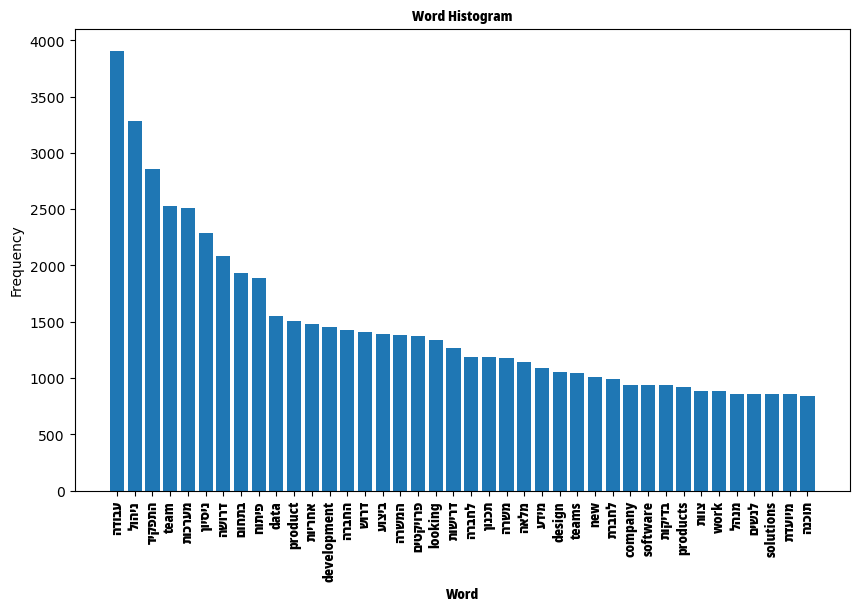

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties

# Download the stopwords corpus
nltk.download('stopwords')

# Read the CSV file
csv = pd.read_csv('Jobs_Data_After_Cleaning.csv')

# Filter high-tech descriptions
hitech_descriptions = csv[csv['is_hitech'] == True]['description']

# Concatenate high-tech descriptions into a single text
hitech_descriptions_text = ' '.join(hitech_descriptions)

# Split the text into individual words
words = hitech_descriptions_text.split()

# Filter out stopwords from the words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Define specific words to be removed from the graph
words_to_remove = ['כאחד','כולל','We','ות','מול','ה','של', 'על', 'עם','ת']  # Add the words you want to remove

# Filter out specific words from the words list
words = [word for word in words if word not in words_to_remove]

# Join the words back into a single string
processed_text = ' '.join(words)

# Convert the Hebrew words to their visual representation
processed_text = get_display(processed_text)

# Create a font properties object for the Hebrew font
hebrew_font_path = r"C:\Users\tomer\Downloads\Noto_Sans_Hebrew\static\NotoSansHebrew_Condensed-Black.ttf"  # Replace with the actual path to your Hebrew font file
hebrew_font = FontProperties(fname=hebrew_font_path)

# Count the frequency of each word
words_count = pd.Series(words).value_counts()

# Get the top 40 frequent words and their counts
top_words = words_count[:40]

# Remove specific words from the top_words
top_words = top_words[~top_words.index.isin(words_to_remove)]

# Convert the index to a list of strings
word_list = top_words.index.tolist()

# Plot the histogram of word frequencies
plt.figure(figsize=(10, 6))
plt.bar(range(len(word_list)), top_words.values)

plt.xlabel("Word", fontproperties=hebrew_font)
plt.ylabel("Frequency")
plt.title("Word Histogram", fontproperties=hebrew_font)

# Rotate x-axis labels for better readability
plt.xticks(range(len(word_list)), [get_display(word) for word in word_list], rotation=90, fontproperties=hebrew_font)

plt.show()
